<a href="https://colab.research.google.com/github/munyanza/Heart_attack_model/blob/main/Heart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
# Import the necessary libraries
# Pandas for data maipulation
import pandas as pd

# Matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit Learn for data preprocessing and model creation
# used for data preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline

# Used for model creation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# save the saved model
import joblib

In [132]:
# Load the dataset
df = pd.read_csv('/content/Medicaldataset.csv')

In [133]:
# View the first 5 rows
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [134]:
# Check missing values
df.isnull().sum()

,0
Age,0
Gender,0
Heart rate,0
Systolic blood pressure,0
Diastolic blood pressure,0
Blood sugar,0
CK-MB,0
Troponin,0
Result,0


In [135]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [136]:
# Statistical data fo the dataset
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


Text(0.5, 1.0, 'Age vs Result')

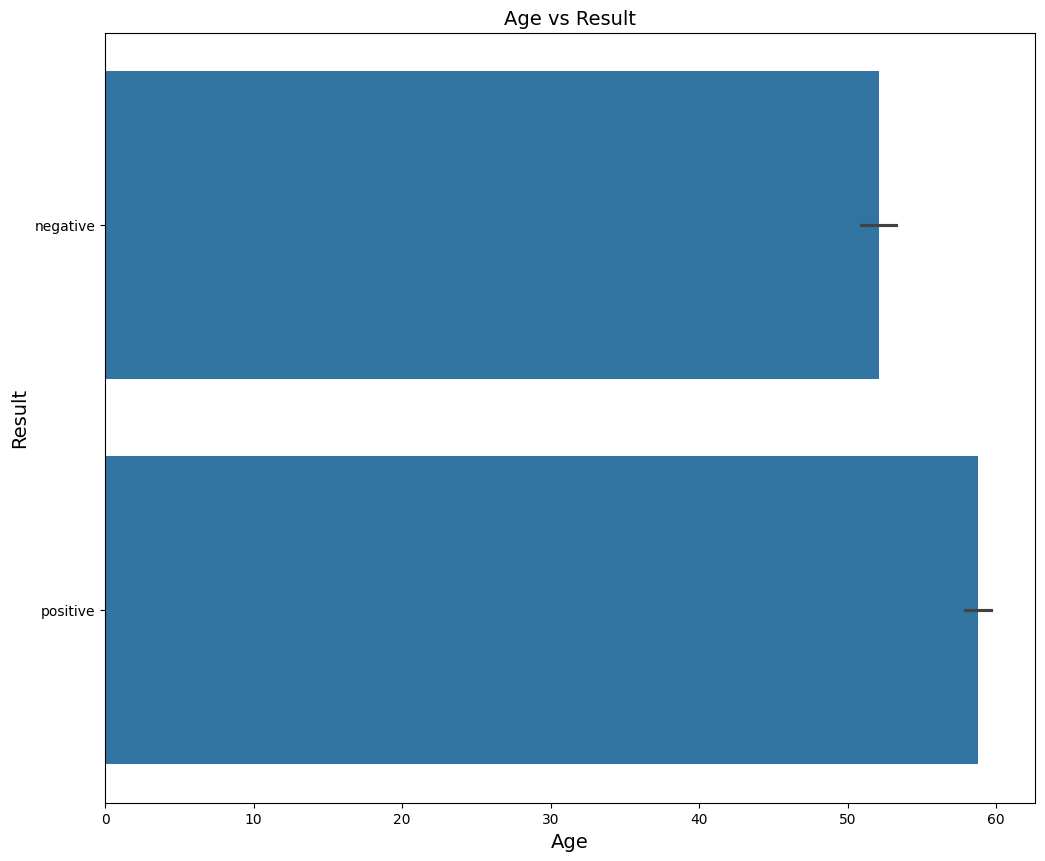

In [137]:
# Age vs Result
plt.figure(figsize=(12,10))
sns.barplot(x='Age',y='Result',data=df)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Result',fontsize=14)
plt.title('Age vs Result',fontsize=14)

Text(0.5, 1.0, 'Age and Result vs Gender')

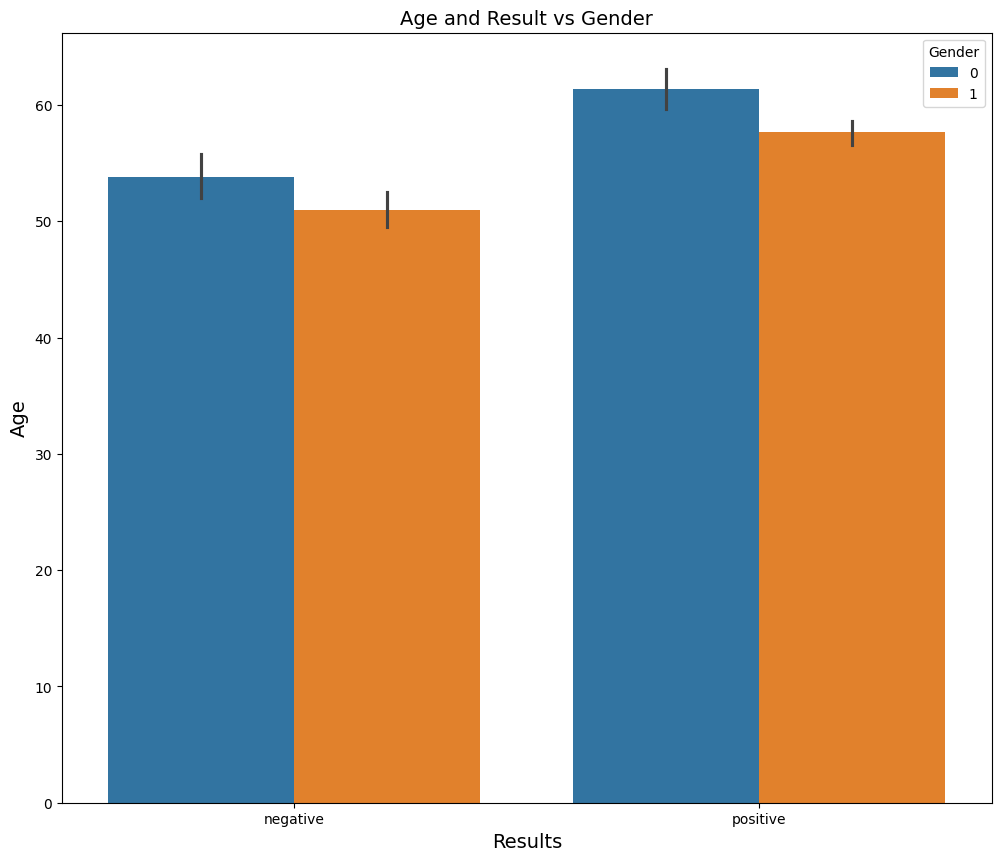

In [138]:
# Age and Gender vs Results
plt.figure(figsize=(12,10))
sns.barplot(x='Result',y='Age',hue='Gender',data=df)
plt.xlabel('Results',fontsize=14)
plt.ylabel('Age',fontsize=14)
plt.title('Age and Result vs Gender',fontsize=14)

Text(0.5, 1.0, 'Blood vs Age vs Gender')

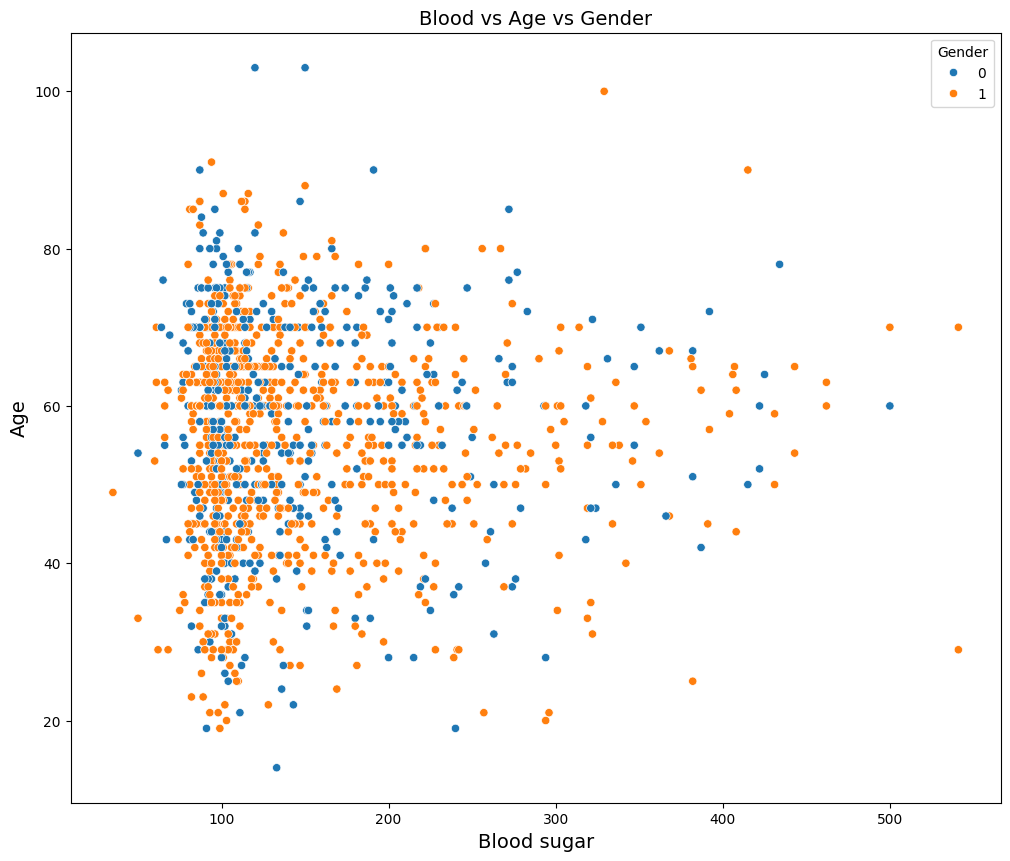

In [139]:
# Blood Sugar vs Age vs Gender
plt.figure(figsize=(12,10))
sns.scatterplot(x='Blood sugar',y='Age',hue='Gender',data=df)
plt.xlabel('Blood sugar',fontsize=14)
plt.ylabel('Age',fontsize=14)
plt.title('Blood vs Age vs Gender',fontsize=14)

In [140]:
# Split the data into features (X) and target(y)

X = df.drop(['Result'],axis=1)
y = df['Result']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [141]:
# Split the features (X) into categorical and numerical columns

categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

print('Categorical Columns: \n',categorical_cols)
print('\nNumerical Columns: \n',numerical_cols)

Categorical Columns: 
 Index([], dtype='object')

Numerical Columns: 
 Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin'],
      dtype='object')


In [142]:
# Transform the columns
numerical_transformer = Pipeline(steps=[
    ('impure',SimpleImputer()),
    ('scale',StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])


In [143]:
# Preprocess the columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',categorical_transformer,categorical_cols),
        ('num',numerical_transformer,numerical_cols)
])

In [144]:
# Convert the Features (X) to preprocessor
X_preprocessed = preprocessor.fit_transform(X)

In [145]:
# Split the preprocessed features (X_preprocessed) and encoded target (y_encoded) into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_encoded, test_size=0.2, random_state=42)

In [146]:
# Train our models

model ={
    'Tree':DecisionTreeClassifier(),
    'Forest':RandomForestClassifier(),
    'Xboost':XGBClassifier()
}

for name,classify in model.items():
  classify.fit(X_train, y_train)
  y_pred = classify.predict(X_test)
  cv_score = cross_val_score(classify,X_test,y_test,cv=5)
  print(f" {name} cross validation score is: {cv_score.mean()*100:.2f}")

 Tree cross validation score is: 93.58
 Forest cross validation score is: 96.23
 Xboost cross validation score is: 96.23


In [148]:
# Save the model
joblib.dump(model['Forest'], 'Heart_Attack_model.pkl')
print("Model saved as Heart_Attack_model.pkl")

Model saved as Heart_Attack_model.pkl
